### 第一个DEMO

SA参数列表及含义:

    + func  目标函数
    + x0  迭代初始点
    + T_max  默认100, 最大温度
    + T_min  默认1e-7, 最小温度
    + L  默认300, 链长
    + max_stay_counter  默认150, 冷却耗时

  另外, scikit-opt 还提供了三种模拟退火流派: Fast, Boltzmann, Cauchy
  参见链接:  https://scikit-opt.github.io/scikit-opt/#/zh/more_sa

In [1]:
demo_func = lambda x: x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2

In [2]:
from sko.SA import SA

sa = SA(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)

best_x: [4.95053049e-06 4.99944037e-02 2.79761713e-06] best_y 6.365326334590854e-11


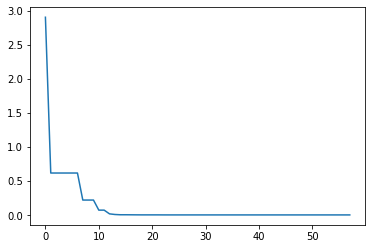

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

### 第二个DEMO TSP求解

In [6]:
# 定义问题
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import sys

file_name = r'./data/nctu.csv'
points_coordinate = np.loadtxt(file_name, delimiter=',')
num_points = points_coordinate.shape[0]
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
distance_matrix = distance_matrix * 111000


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [7]:
# 导包
from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=100, T_min=1, L=10 * num_points)

best_points, best_distance = sa_tsp.run()
print(best_points, best_distance, cal_total_distance(best_points))

[29 41 38 34 19 20 21 18 13 11 14 12 22 47 46 65 33 36 26 74 72  1 31 75
 28 16 17 15  9  7  8 10  4 50 56 64 68  0 51  6  5 61 52 37  3  2 48 49
 60 35 77 39 57 63 42 73 53 44 25 59 30 76 71 62 24 32 54 69 66 58 55 40
 27 43 45 67 70 23] 5376.815734046067 5376.815734046067


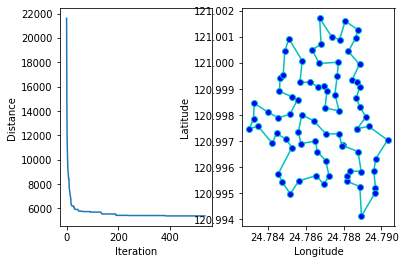

In [8]:
# 绘图
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(sa_tsp.best_y_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()

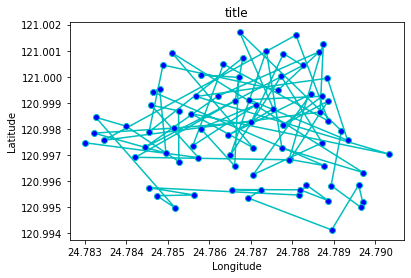

In [11]:
# 制作动画
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

best_x_history = sa_tsp.best_x_history

fig2, ax2 = plt.subplots(1, 1)
ax2.set_title('title', loc='center')
line = ax2.plot(points_coordinate[:, 0], points_coordinate[:, 1],
                marker='o', markerfacecolor='b', color='c', linestyle='-')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
plt.ion()
p = plt.show()


def update_scatter(frame):
    ax2.set_title('iter = ' + str(frame))
    points = best_x_history[frame]
    points = np.concatenate([points, [points[0]]])
    point_coordinate = points_coordinate[points, :]
    plt.setp(line, 'xdata', point_coordinate[:, 0], 'ydata', point_coordinate[:, 1])
    return line


ani = FuncAnimation(fig2, update_scatter, blit=True, interval=25, frames=len(best_x_history))
plt.show()

ani.save('sa_tsp.gif', writer='pillow')